# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [ ]:
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq '/content/drive/MyDrive/animals10.zip'

In [ ]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

class_name = os.listdir("/content/Animals-10")

for name in class_name:
  globals()['{}'.format(name)] = sorted(glob.glob('./Animals-10/' + name + '/*.jpeg'))
  print(name)
  print(len(globals()['{}'.format(name)]))

#test에 넣을 이미지 개수 계산
  globals()['{}_test_count'.format(name)] = round(len(globals()['{}'.format(name)])*0.3)
  print(globals()['{}_test_count'.format(name)])



cat
1227
368
cow
1866
560
chicken
3098
929
horse
2623
787
elephant
1079
324
sheep
1444
433
butterfly
1650
495
dog
4863
1459
spider
4497
1349
squirrel
1862
559


In [ ]:
elephant[:5]

['./Animals-10/elephant/elephant (1).jpeg',
 './Animals-10/elephant/elephant (10).jpeg',
 './Animals-10/elephant/elephant (100).jpeg',
 './Animals-10/elephant/elephant (1000).jpeg',
 './Animals-10/elephant/elephant (1001).jpeg']

In [ ]:
elephant_test_count

324

In [ ]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
# train, test 폴더 경로 선언 & 만들기

for name in class_name:
  globals()['{}_train_path'.format(name)] = './train/' + name
  globals()['{}_test_path'.format(name)] = './test/' + name
  os.makedirs(globals()['{}_train_path'.format(name)], exist_ok=True)
  os.makedirs(globals()['{}_test_path'.format(name)], exist_ok=True)

  split(globals()['{}'.format(name)],globals()['{}_test_count'.format(name)],globals()['{}_train_path'.format(name)],globals()['{}_test_path'.format(name)])

train 폴더 이미지 개수 : 859
test 폴더 이미지 개수 : 368
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 755
test 폴더 이미지 개수 : 324
train 폴더 이미지 개수 : 1011
test 폴더 이미지 개수 : 433
train 폴더 이미지 개수 : 1155
test 폴더 이미지 개수 : 495
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 3148
test 폴더 이미지 개수 : 1349
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [ ]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
ex_img_path = '/content/train/butterfly/butterfly (10).jpeg'
ex_img = Image.open(ex_img_path)
ex_img_np = np.array(ex_img)
print(ex_img_np.shape)
print(ex_img_np[0,0,:])

(225, 300, 3)
[55 69 18]


In [ ]:
import torchvision.transforms as transforms

In [ ]:
# 보통 적용할 augmentation을 ToTensor, Normalize 전에 사용
transform_train = transforms.Compose([
    transforms.Resize(224),                 
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5), # 0.5 확률로 horizontal flip
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

(3, 224, 224)


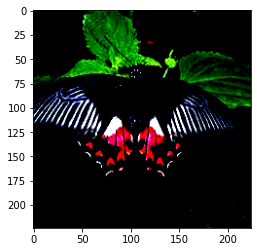

In [ ]:
ex_aug = transform_train(ex_img)
ex_aug_np = np.array(ex_aug)
print(ex_aug_np.shape)

ex_aug_tr = ex_aug_np.transpose(1,2,0)
imshow(ex_aug_tr)

In [ ]:
ex_aug_np[:,0,0]

array([-1.1931673, -1.0728291, -1.5430065], dtype=float32)

In [ ]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_data = torchvision.datasets.ImageFolder(
    root = './train', 
    transform = transform_train
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [ ]:
print(len(train_data))
print(train_data[0][0].shape)
print(train_data[0][1])

16946
torch.Size([3, 224, 224])
0


In [ ]:
# train, test에 대해 DataLoader 정의
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [ ]:
# 16946/32 = 530
len(trainloader)

530

In [ ]:
# 7263/32 = 227
print(len(test_data))
print(len(testloader))

7263
227


In [ ]:
# dataloader의 iteration 하나만 가져와서 확인해보자
tmploader = torch.utils.data.DataLoader(test_data, batch_size = 4, shuffle=False)
dataiter = iter(tmploader)
images, labels = dataiter.next()

In [ ]:
images.shape # 4개 img 배치/채널/높이/너비

torch.Size([4, 3, 224, 224])

In [ ]:
labels.shape # 4개 label

torch.Size([4])

In [ ]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

In [ ]:
import torch.nn as nn

In [ ]:
#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)
# (해당 모델은 임의로 만든 모델로 성능을 보장하지 X)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels= 16, kernel_size=6, stride=2),             # [batch_size,3,224,224] -> [batch_size,16,110,110]
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),            # [32,108,108]
            nn.ReLU(),                             
            nn.Dropout(0.25),
            nn.MaxPool2d(kernel_size=2, stride=2) ,                                #[32,54,54]
            nn.Conv2d(in_channels=32, out_channels=128, kernel_size=3,padding=1),            # [128,54,54]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=3),            # [32,52,52]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2)                                #[32,26,26]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*26*26,100),                                                # []
            nn.ReLU(),
            nn.Linear(100,10) #10개 class
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기
        out = self.fc_layer(out)
        return out

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
if torch.cuda.is_available():
    test_model.cuda()

summary(test_model, (3,224,224), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 110, 110]           1,744
              ReLU-2         [32, 16, 110, 110]               0
            Conv2d-3         [32, 32, 108, 108]           4,640
              ReLU-4         [32, 32, 108, 108]               0
           Dropout-5         [32, 32, 108, 108]               0
         MaxPool2d-6           [32, 32, 54, 54]               0
            Conv2d-7          [32, 128, 54, 54]          36,992
       BatchNorm2d-8          [32, 128, 54, 54]             256
              ReLU-9          [32, 128, 54, 54]               0
           Conv2d-10           [32, 32, 52, 52]          36,896
      BatchNorm2d-11           [32, 32, 52, 52]              64
             ReLU-12           [32, 32, 52, 52]               0
          Dropout-13           [32, 32, 52, 52]               0
        MaxPool2d-14           [32, 32,

In [ ]:
# Device 선언 (GPU 권장)

In [ ]:
# 아래 코드가 보통 device 할당하는 방식
# colab일 경우, 무거운 모델을 돌린다면 런타임 -> 런타임 유형 변경 -> GPU 로 설정하고 돌리는걸 강추
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# 모델 객체 선언
# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Dropout(p=0.25, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=21632, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0002) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)

In [ ]:
# train 함수 정의


In [ ]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.30690336227417
tensor([3, 0, 0, 0, 0, 0, 0, 8, 0, 0, 3, 0, 3, 8, 0, 0, 0, 3, 3, 0, 0, 0, 8, 0,
        7, 8, 0, 0, 0, 3, 8, 2], device='cuda:0')
tensor([0, 9, 0, 3, 4, 8, 4, 2, 5, 4, 4, 7, 7, 4, 7, 6, 1, 0, 3, 7, 7, 8, 1, 4,
        7, 9, 6, 7, 3, 2, 8, 8], device='cuda:0')
4


In [ ]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트 => 그래프 그리기 위해서
# 이거 빼먹고 train 돌리면...
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 100 == 99:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 100 batches: {running_loss / 100}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
# test 함수 정의

In [ ]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [ ]:
# training


In [ ]:
num_epoch = 10

In [ ]:
# 연습 삼아 5 epoch만 진행
# 실제로 훈련할때는 올바른 epoch 설정 필요

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 100
Average train loss of recent 100 batches: 2.890854148864746

Current batch: 200
Average train loss of recent 100 batches: 2.2657198214530947

Current batch: 300
Average train loss of recent 100 batches: 2.2059971857070924

Current batch: 400
Average train loss of recent 100 batches: 2.1645960772037505

Current batch: 500
Average train loss of recent 100 batches: 2.139013705253601

Total train accuarcy: 19.2316770919391
Total train loss: 2.3186506838168737

[ Test epoch: 1 ]

Test accuarcy: 22.428748451053284
Test average loss: 2.083944263437246

[ Train epoch: 2 ]

Current batch: 100
Average train loss of recent 100 batches: 2.046321380138397

Current batch: 200
Average train loss of recent 100 batches: 2.014784528017044

Current batch: 300
Average train loss of recent 100 batches: 2.0164179003238676

Current batch: 400
Average train loss of recent 100 batches: 1.9673069202899933

Current batch: 500
Average train loss of recent 100 batches: 1.927

In [ ]:
# loss, accuracy 추이 확인 with plt.plot

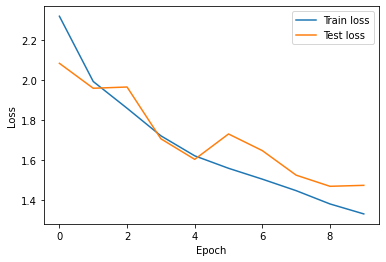

In [ ]:
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

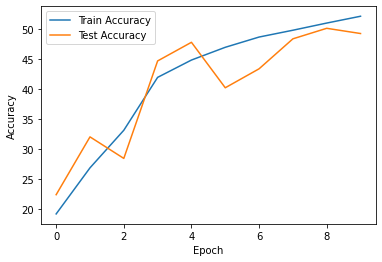

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 결과해석

- 최종 test accuracy는 49%로 적으나, epoch 수가 적었던 만큼 epoch을 충분히 돌린다면 개선 여지가 있다.
  - 학습 시 시간을 줄이려면 파라미터 수를 줄여서 해결할 수 있다.
  - 데이터 자체에 불균형이 학습 시 수렴 시간이 오래 걸리는 원인이 될 수 있다.